# Loading data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('../claims_train.csv')

df.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,2122523.0,0,0.43,D,7,18,36,95,B1,Regular,1054,R24
1,3173420.0,0,0.10,D,7,17,80,95,B2,Regular,598,R25
2,1188619.0,0,0.33,E,7,3,36,76,B6,Regular,4172,R82
3,31400.0,0,0.56,A,5,4,73,52,B13,Diesel,15,R24
4,3138755.0,0,0.27,E,8,0,37,50,B11,Diesel,3021,R53


# Exploring

In [44]:
df1 = df.copy()

In [45]:
df1['cpy'] = df1['ClaimNb'] / df1['Exposure']

In [46]:
df1[df1['cpy'] > 5]

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,cpy
84,3962.0,1,0.06,E,4,0,52,55,B12,Regular,5433,R93,16.666667
88,2225323.0,1,0.08,D,6,2,49,95,B3,Diesel,824,R91,12.500000
493,5583.0,1,0.12,E,5,0,30,54,B12,Regular,5433,R93,8.333333
513,4001936.0,2,0.28,C,6,1,48,50,B12,Regular,175,R72,7.142857
525,10482.0,2,0.09,B,10,0,64,50,B12,Regular,99,R93,22.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541634,133737.0,1,0.10,B,11,7,41,50,B1,Regular,74,R82,10.000000
542103,7801.0,1,0.15,A,10,0,52,50,B12,Regular,28,R54,6.666667
542130,3105791.0,1,0.17,D,10,14,54,72,B2,Diesel,1609,R11,5.882353
542152,4006167.0,1,0.07,C,10,4,46,100,B12,Diesel,458,R93,14.285714


# Target variable

## Exposure time is short and therefore uncertain

- 18% of the data is in the first quartile

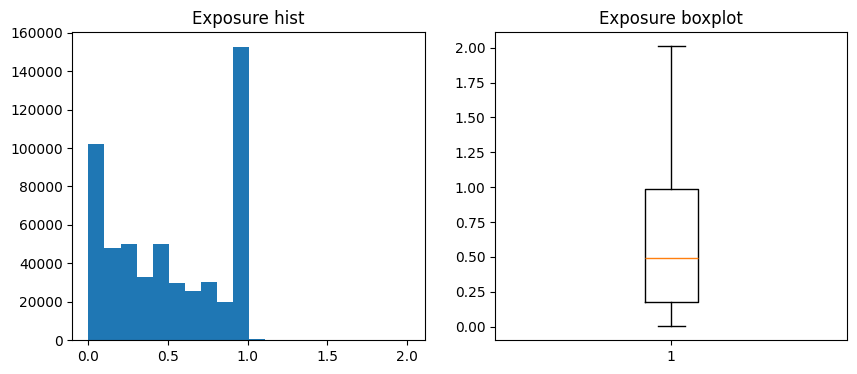

count    542410.000000
mean          0.528840
std           0.364463
min           0.002732
25%           0.180000
50%           0.490000
75%           0.990000
max           2.010000
Name: Exposure, dtype: float64


In [47]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].set_title('Exposure hist')
ax[0].hist(df['Exposure'], bins=20)

ax[1].set_title('Exposure boxplot')
ax[1].boxplot(df['Exposure'])

plt.show()

print(df['Exposure'].describe())

## Claims per year is a bad metric

- Distribution of claims per year of short term policies vs long term

In [ ]:
df1['ClaimNb'].unique()

array([ 0,  1,  2,  3,  4,  6, 11,  5,  9])

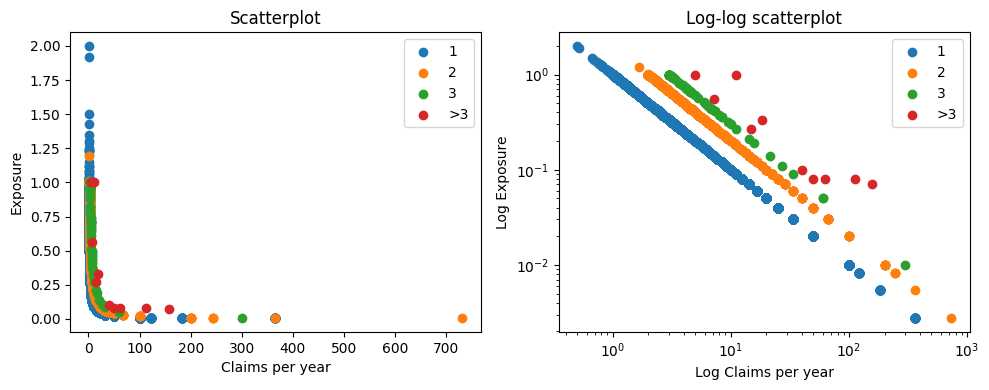

In [77]:
import matplotlib.cm as cm

cmap = cm.tab10
colors = [cmap(i) for i in range(5)]
labels = ['0', '1', '2', '3', '>3']

fig, ax = plt.subplots(1, 2, figsize=(10,4))

for cat in [1, 2, 3, 4]:
  mask = df1['ClaimNb_cat'] == cat
  ax[0].scatter(df1.loc[mask, 'cpy'], df1.loc[mask, 'Exposure'], label=labels[cat])
ax[0].set_title('Scatterplot')
ax[0].set_xlabel('Claims per year')
ax[0].set_ylabel('Exposure')
ax[0].legend()

for cat in [1, 2, 3, 4]:
  mask = df1['ClaimNb_cat'] == cat
  ax[1].scatter(df1.loc[mask, 'cpy'], df1.loc[mask, 'Exposure'], label=labels[cat])
ax[1].set_title('Log-log scatterplot')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('Log Claims per year')
ax[1].set_ylabel('Log Exposure')
ax[1].legend()

plt.tight_layout()
plt.show()